# Support Vector Machine Algorithm

- Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

- The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

- SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

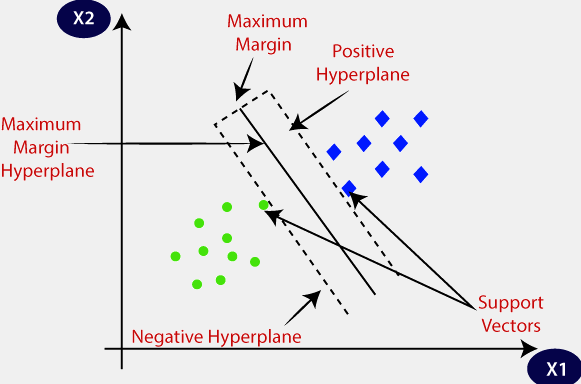

### Example:
Suppose we see a strange cat that also has some features of dogs, so if we want a model that can accurately identify whether it is a cat or dog, so such a model can be created by using the SVM algorithm. We will first train our model with lots of images of cats and dogs so that it can learn about different features of cats and dogs, and then we test it with this strange creature. So as support vector creates a decision boundary between these two data (cat and dog) and choose extreme cases (support vectors), it will see the extreme case of cat and dog. On the basis of the support vectors, it will classify it as a cat.

In [2]:
# import libraries
from sklearn import datasets

# load data set
cancer = datasets.load_breast_cancer()

In [3]:
# print features of the dataset
print("Features: ", cancer.feature_names)

# print labels(types of cancer(malignant, benign)) of the dataset
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [5]:
# check its shape
cancer.data.shape

(569, 30)

In [6]:
# print top 5 records in the cancer dataset
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [7]:
# print the labels (malignant or benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [8]:
# import train and test split selection
from sklearn.model_selection import train_test_split

# Split dataset into training and testing
x_train, x_test,  y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

In [9]:
# import svm
from sklearn import svm

# create svm classifier
svm_clf = svm.SVC(kernel='linear') # Linear kernel

# Train the model using the training sets
svm_clf.fit(x_train, y_train)

# predict the responce for test dataset
y_pred = svm_clf.predict(x_test)

In [10]:
# import metrics from sklearn library
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)

# Model accuracy: how often the classifier is correct?
print("Accuracy: ",score)

Accuracy:  0.956140350877193


In [13]:
# use precision score to calculate the accuracy of the model above
print("Precision: ",metrics.precision_score(y_test, y_pred))

# use recall score to calculate the accuracy of the model above
print("Recall: ",metrics.recall_score(y_test, y_pred))

Precision:  0.984375
Recall:  0.9402985074626866


In [14]:
# we draw confusion matrix of the model above
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[46,  1],
       [ 4, 63]], dtype=int64)

Text(0.5, 1.0, 'Support Vector MAchine Accuracy Percentage: 95.6140350877193')

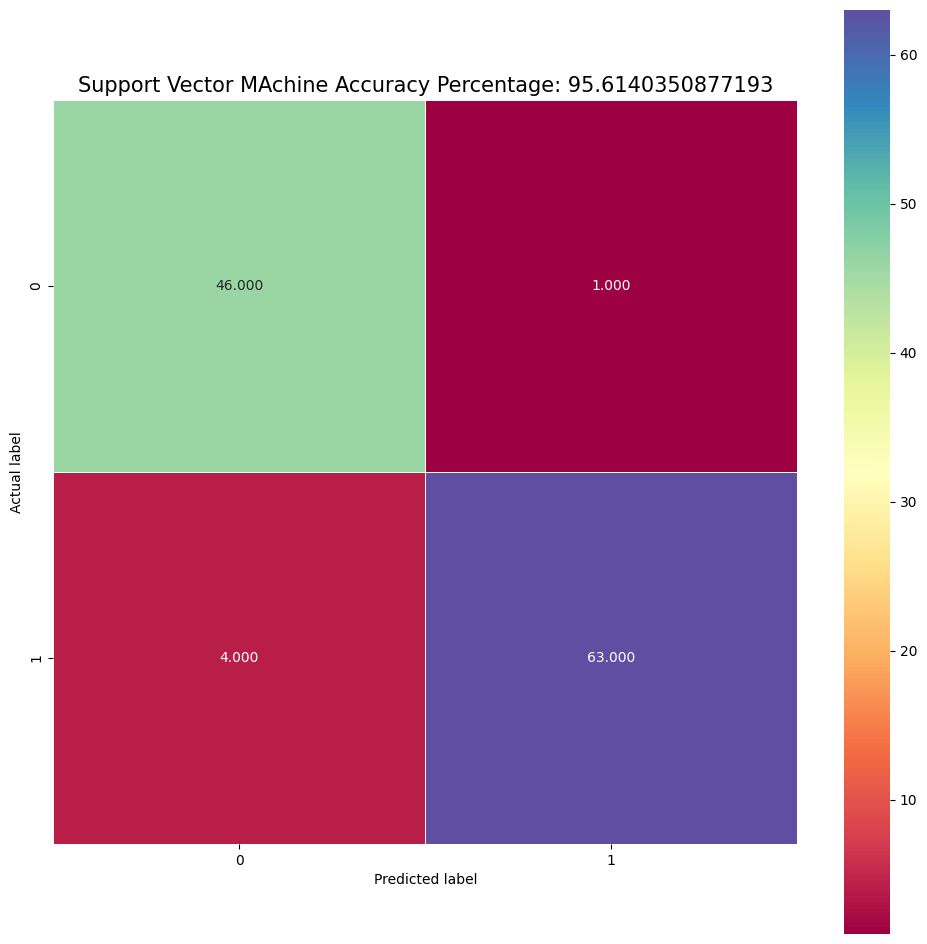

In [17]:
# draw plot of the model
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Spectral')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Support Vector MAchine Accuracy Percentage: {0}'.format(score*100)
plt.title(all_sample_title, size = 15)